0 5 1
1 5 1
2 5 1
3 5 1
4 5 1
5 5 1
6 5 1


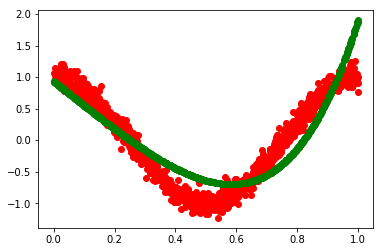

In [5]:
import numpy, math
import matplotlib.pyplot as plt
import random

#get normal random data
def getData(N,sigma):
    
    x = numpy.random.uniform(0,1,N)
    mu = 0
    random_numbers = numpy.random.normal(mu, sigma, N)
    def fun(i):
        yi = math.cos(2*math.pi*x[i])+random_numbers[i]
        return yi

    y=[]
    for i in range(x.size):
        y.append(fun(i))
    return x,y

#initialize data
def initialization(d):
    a = []
    for i in range(0,d):
        a.append(random.random())
    return a

def predict_function(d,a,xi):
    yi_hat = 0
    for i in range(d):
        yi_hat = yi_hat + a[i]*math.pow(xi,i)
    return yi_hat

def predict_y(d,a,x):
    y_hat = []
    for xi in x:
        y_hat.append(predict_function(d,a,xi))
    return y_hat

#calculating mse
def getMSE(y,y_hat,N):
    mse = 0
    for i in range(N):
        try:
            mse = mse + math.pow((y[i]-y_hat[i]),2)
        except OverflowError:
            print("mse",mse)
            print("y[i]",y[i])
            print("y_hat[i]",y_hat[i])
    mse = mse/N
    return mse

#gradient descent
def fitData_GD(y,y_hat,x,a,d,N,learning_rate,regular_rate):
    
    for i in range(d):
        derivative = 0
        for k in range(N):
            derivative = derivative + 2*(y[k]-y_hat[k])*math.pow(x[k],i)
        derivative = derivative/N
        a[i] = a[i] + learning_rate*derivative - 2*regular_rate*a[i]
    return a

def experiment(N,d,sigma,M):
  
    learning_threshold = 2000
    a_list = []
    Ein_list = []
    Eout_list = []
    
    regular_rate = 0
    # with regularization: regular_rate = 0.1
    # withour regularization: regular_rate = 0
    
    for m in range(M):
        X,y=getData(N,sigma)
#         plt.plot(X,y,'ro')
        X_test,y_test = getData(1000,sigma)
        learning_rate = 0.1
        a = initialization(d)
        y_hat = predict_y(d,a,X)
#         plt.plot(X,y_hat,'bo')
        Ein = getMSE(y,y_hat,N)
#         plot_index = 0
        for time in range(learning_threshold):
            a = fitData_GD(y,y_hat,X,a,d,N,learning_rate,regular_rate)
            y_hat = predict_y(d,a,X)
            Ein = getMSE(y,y_hat,N)
#             plt.plot(plot_index,Ein,'go')
#             plot_index = plot_index + 1
            if(time%100 == 0):
                learning_rate *= 0.96
            #learning rate decay

#         print("Ein",Ein)
#         plt.plot(X,y,'yo')
#         plt.plot(X,y_hat,'wo')
        
        y_hat_test = predict_y(d,a,X_test)
        Eout = getMSE(y_test,y_hat_test,1000)
#         print("Eout",Eout)
#         plt.plot(X_test,y_test,'po')
#         plt.plot(X_test,y_hat_test,'do')
        a_list.append(a)
        Ein_list.append(Ein)
        Eout_list.append(Eout)
#     print("Ein_list",Ein_list)
#     print("Eout_list",Eout_list)
    Ein_average = sum(Ein_list)/M
    Eout_average = sum(Eout_list)/M
#     print("Ein_average",Ein_average)
#     print("Eout_average",Eout_average)
    a_list = numpy.asarray(a_list)
    a_average = numpy.sum(a_list,axis=0)
    a_average = a_average / M
    X_bias,y_bias = getData(1000,sigma)
    y_hat_bias = predict_y(d,a_average,X_bias)
    Ebias = getMSE(y_bias,y_hat_bias,1000)
#     print("Ebias",Ebias)
    return Ein_average, Eout_average, Ebias, X_bias, y_bias, y_hat_bias
    
# Ein_average, Eout_average, Ebias, X_bias, y_bias, y_hat_bias = experiment(200,20,0.01,50)


N_list = [2,5,10,20,50,100,200]
d_list = [d for d in range(21)]
sigma_list = [0.01,0.1,1]
# print(d_list)
results = numpy.full((len(N_list),len(d_list),len(sigma_list),3), 0,dtype=float)
bias_points = numpy.full((len(N_list),len(d_list),len(sigma_list),3,1000), 0,dtype=float)
#In this case. fixing complexity with polinomial=5, and random variance=0.1 to research difference with different dataset size
for N in range(len(N_list)):
#     if N!=6:
#       continue;
    for d in range(len(d_list)):
        if d!=5:
          continue;
        for sigma in range(len(sigma_list)):
            if sigma!= 1:
              continue;
            print(N,d,sigma)
            Ein_average, Eout_average, Ebias, X_bias, y_bias, y_hat_bias = experiment(N_list[N],d_list[d]+1,sigma_list[sigma],30)
            results[N][d][sigma][0] = Ein_average
            results[N][d][sigma][1] = Eout_average
            results[N][d][sigma][2] = Ebias
            bias_points[N][d][sigma][0] = X_bias
            bias_points[N][d][sigma][1] = y_bias
            bias_points[N][d][sigma][2] = y_hat_bias

plt.plot(bias_points[N][5][1][0],bias_points[N][5][1][1],'ro')
plt.plot(bias_points[N][5][1][0],bias_points[N][5][1][2],'go')

In [0]:
# #fixing dataset size and complexity to research random variance
# plot_x_axis = sigma_list
# plt.title("sigma with N=200,d=10")
# plt.xlabel("sigma")
# plt.ylabel("mse")
# plot_y_axis = [results[6][10][s][0] for s in range(len(sigma_list))]
# plt.plot(plot_x_axis,plot_y_axis,'r-',label="Ein_average")
# plt.plot(plot_x_axis,plot_y_axis,'ro')
# plot_y_axis = [results[6][10][s][1] for s in range(len(sigma_list))]
# plt.plot(plot_x_axis,plot_y_axis,'b-',label="Eout_average")
# plt.plot(plot_x_axis,plot_y_axis,'bo')
# plot_y_axis = [results[6][10][s][2] for s in range(len(sigma_list))]
# plt.plot(plot_x_axis,plot_y_axis,'g-',label="Ebias")
# plt.plot(plot_x_axis,plot_y_axis,'go')
# plt.legend(loc='upper center', fontsize='small')
# plt.show()

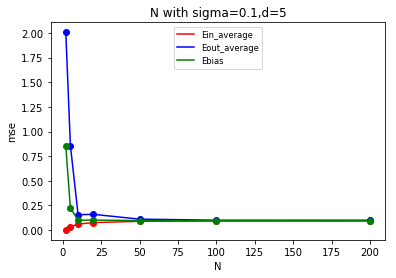

In [7]:
# fixing random variance and complexity to research dataset size
plot_x_axis = N_list
plt.title("N with sigma=0.1,d=5")
plt.xlabel("N")
plt.ylabel("mse")
plot_y_axis = [results[n][5][1][0] for n in range(len(N_list))]
plt.plot(plot_x_axis,plot_y_axis,'r-',label="Ein_average")
plt.plot(plot_x_axis,plot_y_axis,'ro')
plot_y_axis = [results[n][5][1][1] for n in range(len(N_list))]
plt.plot(plot_x_axis,plot_y_axis,'b-',label="Eout_average")
plt.plot(plot_x_axis,plot_y_axis,'bo')
plot_y_axis = [results[n][5][1][2] for n in range(len(N_list))]
plt.plot(plot_x_axis,plot_y_axis,'g-',label="Ebias")
plt.plot(plot_x_axis,plot_y_axis,'go')
plt.legend(loc='upper center', fontsize='small')
plt.show()

In [0]:
#fixing dataset size and random variance to research complexity
# plot_x_axis = d_list
# plt.title("d with N=50,sigma=0.1")
# plt.xlabel("d")
# plt.ylabel("mse")
# plot_y_axis = [results[4][d][1][0] for d in range(len(d_list))]
# plt.plot(plot_x_axis,plot_y_axis,'r-',label="Ein_average")
# plt.plot(plot_x_axis,plot_y_axis,'ro')
# plot_y_axis = [results[4][d][1][1] for d in range(len(d_list))]
# plt.plot(plot_x_axis,plot_y_axis,'b-',label="Eout_average")
# plt.plot(plot_x_axis,plot_y_axis,'bo')
# plot_y_axis = [results[4][d][1][2] for d in range(len(d_list))]
# plt.plot(plot_x_axis,plot_y_axis,'g-',label="Ebias")
# plt.plot(plot_x_axis,plot_y_axis,'go')
# plt.legend(loc='upper center', fontsize='small')
# plt.show()